In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import math
from sklearn import metrics
%matplotlib inline
from IPython.display import HTML

In [ ]:
df=pd.read_csv("Train.csv")

In [ ]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,1/1/2018 0:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,1/1/2018 0:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,1/1/2018 0:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,1/1/2018 1:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,1/1/2018 1:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27999 entries, 0 to 27998
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  27999 non-null  object 
 1   Usage_kWh                             27999 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  27999 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  27880 non-null  float64
 4   CO2(tCO2)                             27999 non-null  float64
 5   Lagging_Current_Power_Factor          27999 non-null  float64
 6   Leading_Current_Power_Factor          27923 non-null  float64
 7   NSM                                   27999 non-null  int64  
 8   WeekStatus                            26225 non-null  object 
 9   Day_of_week                           26225 non-null  object 
 10  Load_Type                             27999 non-null  object 
dtypes: float64(6), 

In [ ]:
df.isnull().sum()

date                                       0
Usage_kWh                                  0
Lagging_Current_Reactive.Power_kVarh       0
Leading_Current_Reactive_Power_kVarh     119
CO2(tCO2)                                  0
Lagging_Current_Power_Factor               0
Leading_Current_Power_Factor              76
NSM                                        0
WeekStatus                              1774
Day_of_week                             1774
Load_Type                                  0
dtype: int64

- since data loss is very few there is no need for model based imputations or deck imputuations

- replacing lost values by mode(most common ) for categorical columns 
-replacing lost values by mean for continous columns (data is not normally distributed but 119/27999=0.4%),also for categorical its 6% not worth the hasle


In [ ]:
df['WeekStatus'].fillna(df['WeekStatus'].mode()[0], inplace = True)
df['Day_of_week'].fillna(df['Day_of_week'].mode()[0], inplace = True)
#---------------------------------------------------------------------------
df['Leading_Current_Power_Factor'].fillna(df['Leading_Current_Power_Factor'].mean(), inplace = True)
df['Leading_Current_Reactive_Power_kVarh'].fillna(df['Leading_Current_Reactive_Power_kVarh'].mean(), inplace = True)

In [ ]:
print(df['WeekStatus'].unique())
print(df['Day_of_week'].unique())
print(df['Load_Type'].unique())

['Weekday' 'Weekend']
['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']
['Light_Load' 'Medium_Load' 'Maximum_Load']


<Axes: >

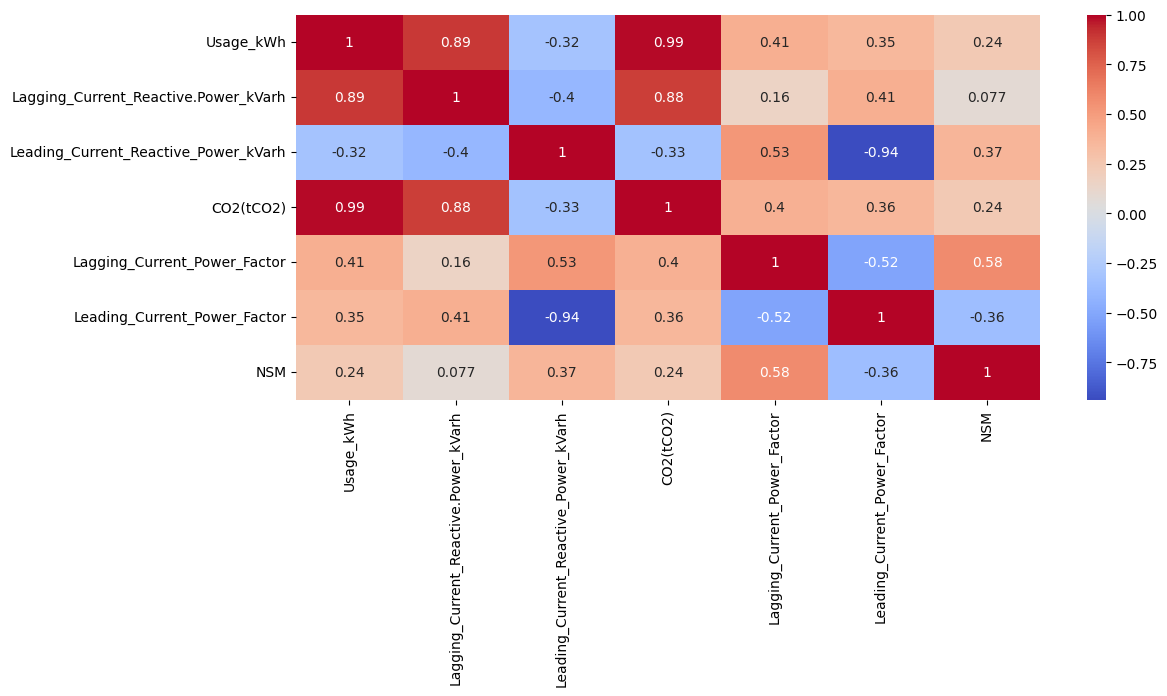

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

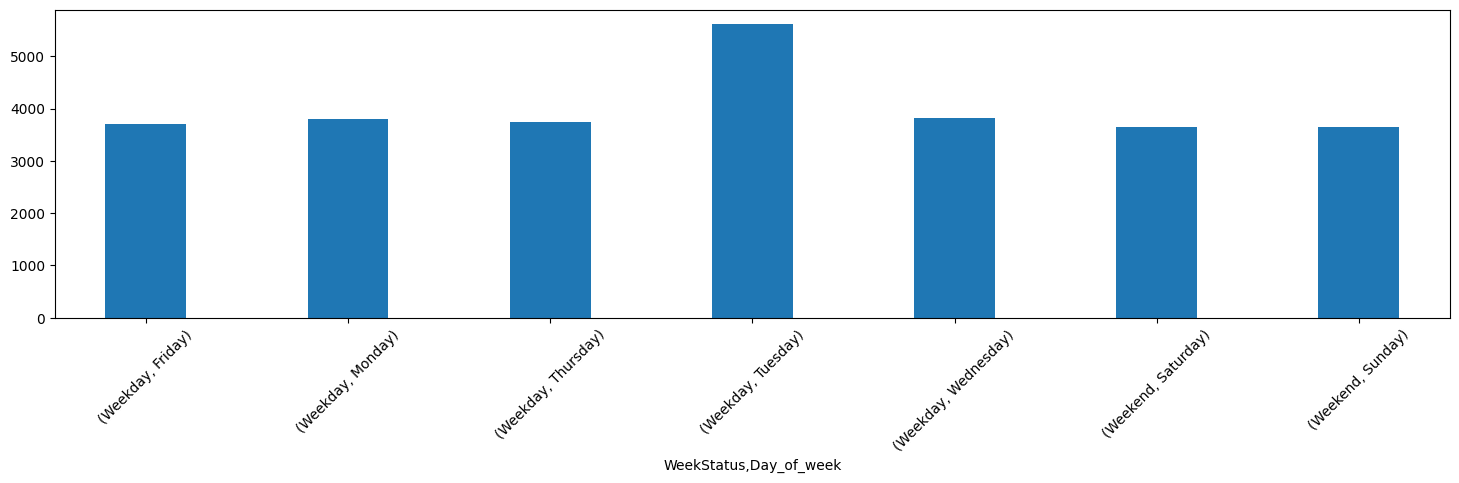

In [ ]:
plt.figure(figsize=(18,4))
color = plt.cm.copper(np.linspace(0, 1, 10))
df.groupby(['WeekStatus','Day_of_week'])['Usage_kWh'].count().plot(kind='bar', width=.4);
plt.xticks(rotation=45);

-usage vs weekday is nearly normally distributed (Bell shape)

In [ ]:
#sns.pairplot(df)

In [ ]:
most_energy_consumption = pd.pivot_table(df, index = 'date', values = 'Usage_kWh', aggfunc = {'Usage_kWh' : np.max})
most_energy_consumption.head()

,Usage_kWh
date,
1/1/2018 0:00,3.42
1/1/2018 0:15,3.17
1/1/2018 0:30,4.00
1/1/2018 0:45,3.24
1/1/2018 10:00,3.64


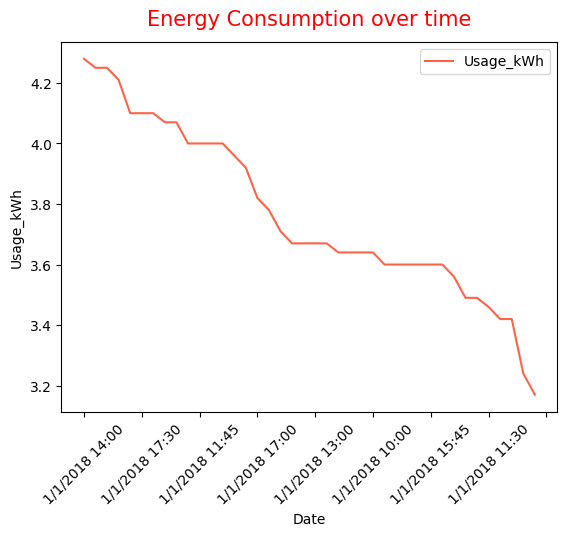

In [ ]:
chart = most_energy_consumption[:40].sort_values(by = 'Usage_kWh', ascending = False).plot(kind = 'line', color = 'tomato')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Energy Consumption over time', fontsize = 15, color = 'r', loc = 'center', pad = 12)
plt.xlabel('Date')
plt.ylabel('Usage_kWh')
plt.show()

- Instead of splitting date value into day ,month , year & hour it can be used as an index for plotting usage against time 

In [ ]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,1/1/2018 0:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,1/1/2018 0:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,1/1/2018 0:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,1/1/2018 1:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,1/1/2018 1:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


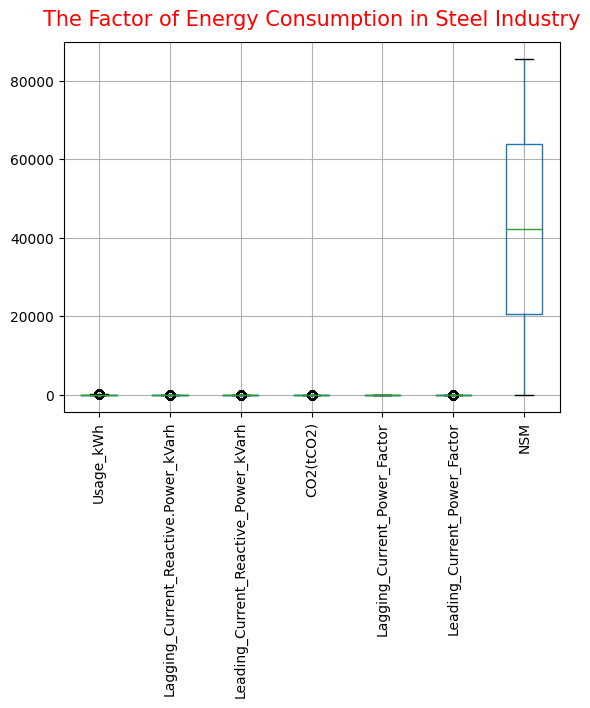

In [ ]:
chart = df.boxplot(column = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
                    'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.title('The Factor of Energy Consumption in Steel Industry', fontsize = 15, color = 'r', pad = 12)

plt.show()

In [ ]:
df = df.set_index('date')
df = pd.get_dummies(df, drop_first = True)

In [ ]:
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
date,,,,,,,,,,,,,,,,
1/1/2018 0:15,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
1/1/2018 0:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
1/1/2018 0:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
1/1/2018 1:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
1/1/2018 1:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


In [ ]:
X = df.drop('Usage_kWh', axis = 1)
y = df['Usage_kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

- FOR NOW OUR VALIDATION IS CALLED TEST !!!





In [ ]:
lr = LinearRegression()
%time lr.fit(X_train, y_train)
lr.score(X_test, y_test)

CPU times: user 16.8 ms, sys: 16.8 ms, total: 33.6 ms
Wall time: 27.4 ms


0.9832785045958382

- Regression Model

In [ ]:
ridge = Ridge(alpha = 0.5)
%time ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

CPU times: user 8.87 ms, sys: 19.9 ms, total: 28.8 ms
Wall time: 14.4 ms


0.9641222980614004

In [ ]:
lasso = Lasso(alpha = 0.5)
%time lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

CPU times: user 20.6 ms, sys: 43.5 ms, total: 64.2 ms
Wall time: 32.1 ms


0.9096284640964968

- Linear regression is the best 

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1,0.5, 1, 10, 100]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.02683e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.02716e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.02675e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.02441e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Il

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(grid_search.best_params_)
print(grid_search.score(X_test,y_test))

{'alpha': 0.001}
-19.283922640587942


- using grid search for aplha hyper param for proof replace 0.5 with 0.001 resulted in an increase by 2%

In [ ]:
ridge = Ridge(alpha = 0.001)
%time ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

CPU times: user 5.1 ms, sys: 6.17 ms, total: 11.3 ms
Wall time: 5.66 ms


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.21662e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.9832568955406041

- This proofs that alpha 0.001 is better than 0.5 

In [ ]:
y_pred = lr.predict(X_test)


In [ ]:
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error :  2.650976944261541
Mean Squared Error :  19.25903434400705
Root Mean Squared Error :  4.388511631978096


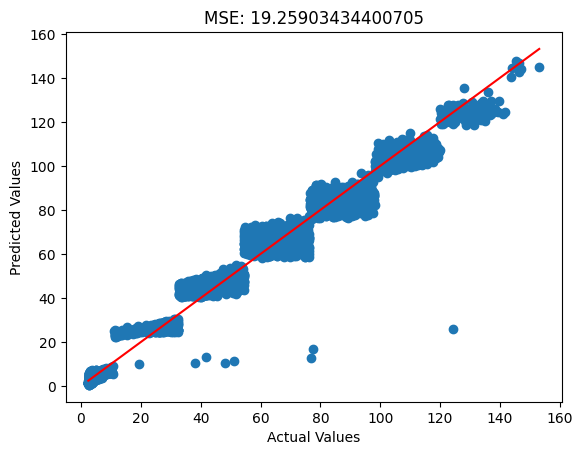

In [ ]:
mse=metrics.mean_squared_error(y_test, y_pred)
plt.scatter(y_test, y_pred)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('MSE: {}'.format(mse))
plt.show()

- Plotting the linear regression graph

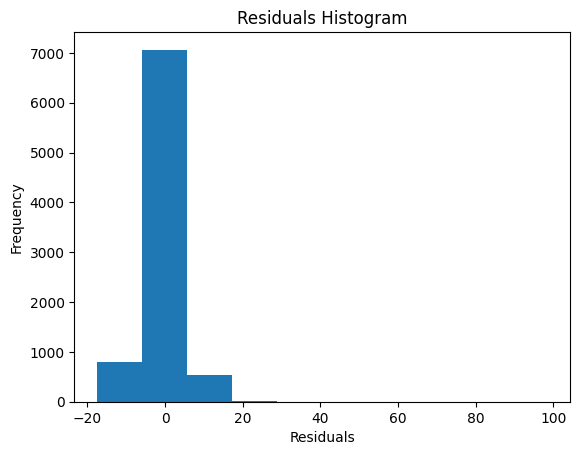

In [ ]:

residuals = y_test - y_pred
plt.hist(residuals)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Histogram')
plt.show()


In [ ]:
from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.1, 1.0, 10)
cv = 5 

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(lr, X_train, y_train, train_sizes=train_sizes, cv=cv)


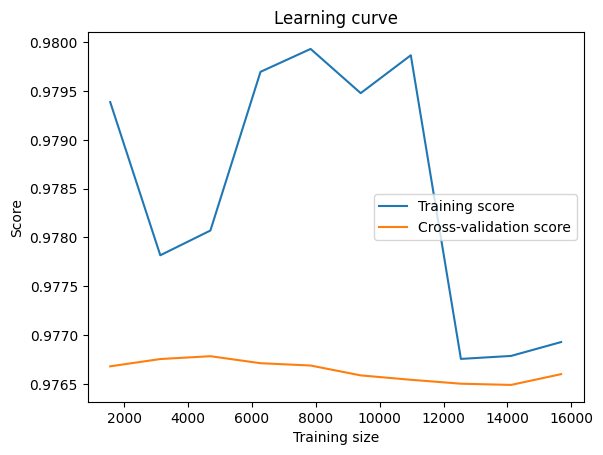

In [ ]:
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

In [ ]:
train_mse = -np.mean(train_scores, axis=1)
test_mse = -np.mean(test_scores, axis=1)

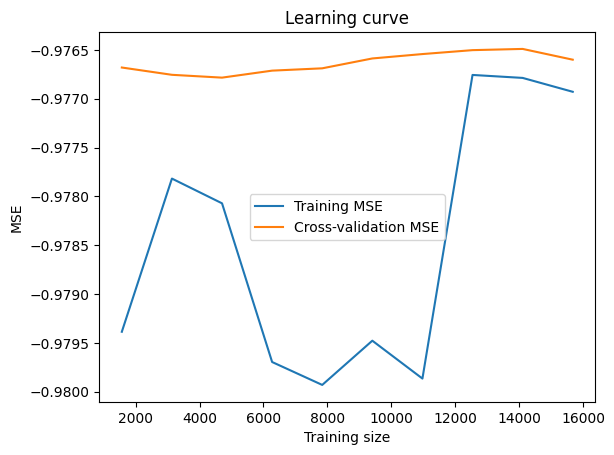

In [ ]:
plt.plot(train_sizes, train_mse, label='Training MSE')
plt.plot(train_sizes, test_mse, label='Cross-validation MSE')
plt.title('Learning curve')
plt.xlabel('Training size')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.show()

In [ ]:
dft=pd.read_csv("Test.csv")
dft.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,19/10/2018 16:00,99.36,63.68,0.0,0.05,84.19,100.0,57600,Weekday,Friday,Maximum_Load
1,19/10/2018 16:15,88.49,54.18,0.0,0.04,85.28,100.0,58500,Weekday,Friday,Maximum_Load
2,19/10/2018 16:30,89.86,55.04,0.0,0.04,85.28,100.0,59400,Weekday,Friday,Maximum_Load
3,19/10/2018 16:45,56.66,36.40,0.0,0.03,84.13,100.0,60300,Weekday,Friday,Maximum_Load
4,19/10/2018 17:00,56.95,35.17,0.0,0.03,85.08,100.0,61200,Weekday,Friday,Maximum_Load


- Importing test data for checking

In [ ]:
dft = dft.set_index('date')
dft = pd.get_dummies(dft, drop_first = True)

- since test data is same as training no nead to use encoder transform function as both training and testing categorical columns will have same code values

In [ ]:
X2 = dft.drop('Usage_kWh', axis = 1)
y2 = dft['Usage_kWh']


In [ ]:

%time lr.predict(X2)
lr.score(X2,y2)

CPU times: user 1.73 ms, sys: 2.03 ms, total: 3.76 ms
Wall time: 3.74 ms


0.987169091361164

- Having nearly the same training & test Accuracy , then the model is performing good  